## Load MNIST dataset

Scikit-learn provides tools to fetch and load popular datasets such as MNIST.  
In this section, we will learn how to solve classification problems on MNIST dataset


from sklearn.datasets import fetch_openml

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml("mnist_784", version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X = mnist['data']
Y = mnist['target']
Y = Y.astype(np.uint8)

In [6]:
# split entire dataset into train/test sets
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [7]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

To simplify problem, let's first build a classifier which determines whether a number written in a given MNIST image is 5 or not. 

In [8]:
y_train_5 = (Y_train == 5)
y_test_5 = (Y_test == 5)

In [9]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [10]:
from sklearn.linear_model import SGDClassifier

In [11]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

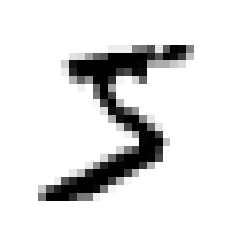

In [12]:
# prepare data for examination
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [13]:
Y[0]

5

In [14]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

이런 식의 성능 평가는 굉장히 위험하다. 

이 데이터셋에는 각 클래스의 숫자가 10%씩 들어있기 때문에 만약 모든 숫자를 5가 아니라고 예측하는 분류기를 만들 경우,  
이 분류기의 정확도는 90%나 된다!

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [20]:
from sklearn.metrics import precision_score, recall_score

In [21]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [22]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [23]:
from sklearn.metrics import f1_score

In [24]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [30]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [37]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

In [33]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

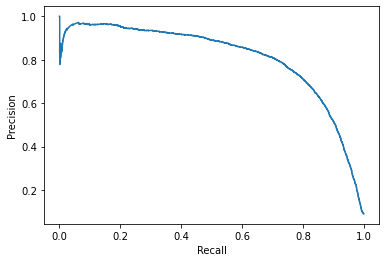

In [38]:
disp = PrecisionRecallDisplay(precisions, recalls)
disp.plot()

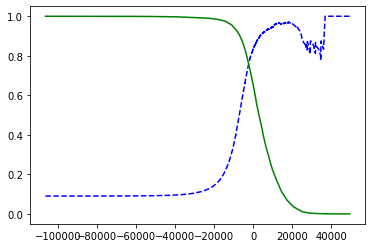

In [41]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Sensitivity")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [44]:
from sklearn.metrics import roc_curve

In [45]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

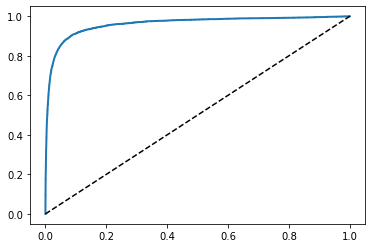

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.show()

이제 SGD Classifier과 비교를 위한 RandomForestClassifier를 훈련시켜 비교를 해보자.  
두 모델의 성능을 비교할 수 있는 한 가지 방법은 ROC curve를 그린 후, 그래프 아래의 면적을 비교하는 것이다.  

성능이 우수한 모델일수록 AUC (Area Under Curve)가 1에 가까워진다. ideal classifier의 경우 1이다.

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
forest_clf = RandomForestClassifier(random_state=42)
y_probabs_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [53]:
print(y_probabs_forest)
print(y_probabs_forest.shape)

[[0.11 0.89]
 [0.99 0.01]
 [0.96 0.04]
 ...
 [0.02 0.98]
 [0.92 0.08]
 [0.94 0.06]]
(60000, 2)


In [52]:
y_scores_forest = y_probabs_forest[:, 1]
fpr_forest, tpr_forest, _ = roc_curve(y_train_5, y_scores_forest)

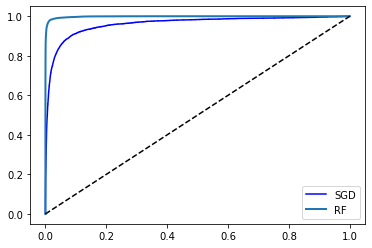

In [54]:
plt.plot(fpr, tpr, "b-", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="RF")
plt.legend(loc="lower right")
plt.show()